# Machine Learning Project - Spring 2023

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `telecom_df` data frame in this project. This data set contains information on over 1,000 customer of a U.S. telecommunications company. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their mobile and Internet service and develop machine learning algorithms that will predict the likelihood of a customer canceling their service in the future.

## Telecommunications Data

The `telecom_df` data frame contains information on the customers of a large U.S. telecommunications company which provides Internet and cellular service. 

The company is looking to see if it can determine the factors that lead to customers canceling their service and whether it can predict if a customer will cancel their service in the future. 

The company has experienced record levels of customers leaving their service in the past couple of years and this is leading to large financial losses. 

The goal is to become better at identifying customers at risk of canceling their service to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

- What are the factors that are associated with customers canceling their service?
- Is it possible to predict whether a customer will cancel their service? If so, how accurate are the predictions?
- How many costly errors is the model expected to produce (customers classified as not canceling, but eventually do)?
- Are there any actions or policies the company can implement to reduce the risk of service cancellation?

The data set contains a mixture of customer information (senior citizen indicator, presence of dependents, months with the company, etc..), and customer behavior (type of Internet and cellular service, average monthly call minutes, etc...)

The outcome variable in this data is `canceled_service`. This variable records whether a customer eventually canceled their service and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'yes' as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

### Data Definitions

| Variable            	| Definition                                 	| Data Type 	|
|:---------------------	|:--------------------------------------------	|:-----------	|
| canceled_service    	| Service cancellation (yes/no)             	| Factor    	|
| senior_citizen      	| Senior citizen (yes/no)                    	| Factor    	|
| spouse_partner      	| Spouse/Domestic partner (yes/no)           	| Factor    	|
| dependents          	| Household dependents (yes/no)              	| Factor    	|
| cellular_service    	| Type of ceullar service                    	| Factor    	|
| avg_call_mins       	| Average monthly call minutes               	| Numeric   	|
| avg_intl_mins       	| Average monthly international call minutes 	| Numeric   	|
| internet_service    	| Type of Internet service                   	| Factor    	|
| online_security     	| Online security (yes/no)                   	| Factor    	|
| online_backup       	| Online backup (yes/no)                     	| Factor    	|
| device_protection   	| Device protection (yes/no)                 	| Factor    	|
| tech_support        	| Tech support plan (yes/no)                 	| Factor    	|
| streaming_tv        	| Streaming TV (yes/no)                      	| Factor    	|
| streaming_movies    	| Streaming Movies (yes/no)                  	| Factor    	|
| contract            	| Contract Type                              	| Factor    	|
| paperless_bill      	| Paperless Billing (yes/no)                 	| Factor    	|
| payment_method      	| Payment Method                             	| Factor    	|
| months_with_company 	| Number of months with company              	| Numeric   	|
| monthly_charges     	| Monthly fees and charges                   	| Numeric   	|

In [210]:
# Load data
library(tidyverse)

telecom_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/telecom_df.rds'))

In [211]:
# View data
telecom_df

canceled_service,senior_citizen,spouse_partner,dependents,cellular_service,avg_call_mins,avg_intl_mins,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_bill,payment_method,months_with_company,monthly_charges
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
no,no,no,no,single_line,307,105,digital,no,yes,yes,no,no,no,month_to_month,yes,credit_card,33,66.40
no,no,yes,yes,single_line,270,126,digital,yes,no,no,no,no,yes,one_year,no,mailed_check,9,48.60
no,no,yes,no,multiple_lines,349,130,fiber_optic,yes,yes,yes,no,no,yes,one_year,yes,electronic_check,71,109.60
yes,yes,yes,no,multiple_lines,357,59,fiber_optic,yes,yes,no,no,no,yes,month_to_month,yes,credit_card,7,94.70
no,no,no,yes,multiple_lines,370,181,fiber_optic,yes,no,yes,yes,no,no,two_year,yes,credit_card,66,90.95
no,yes,no,no,single_line,390,102,digital,no,yes,yes,no,no,no,month_to_month,yes,electronic_check,7,64.95
no,yes,yes,no,multiple_lines,369,89,fiber_optic,yes,yes,yes,no,yes,no,month_to_month,no,bank_draft,50,108.75
no,no,no,no,multiple_lines,325,142,fiber_optic,yes,yes,yes,yes,yes,no,month_to_month,yes,bank_draft,17,106.65
no,no,yes,yes,single_line,307,74,fiber_optic,no,no,no,yes,yes,yes,month_to_month,yes,electronic_check,9,75.85


# Exploratory Data Analysis (50 Points)

In this section, you must think of **at least 5 relevant questions** that explore the relationship between `canceled_service` and the other variables in the `telecom_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not cancel their service.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="./images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>

<p align="center">
<img 
  src="./images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:Does cellular service and contract type affect customer service cancellation?





**Answer**:According to the summary table, 199 customers in multiple line month-to-month service cancelled and 189 customers in single line month-to-month service cancelled. According to the bar graph, a large fraction of consumers who discontinued their service had a month-to-month contract.


## Supporting Analysis

In [212]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

`summarise()` has grouped output by 'canceled_service', 'cellular_service'. You
can override using the `.groups` argument.
New names:
• `` -> `...1`


canceled_service,cellular_service,contract,total_customers
<fct>,<fct>,<fct>,<int>
yes,multiple_lines,month_to_month,199
yes,multiple_lines,one_year,16
yes,multiple_lines,two_year,8
yes,single_line,month_to_month,189
yes,single_line,one_year,13
yes,single_line,two_year,2
no,multiple_lines,month_to_month,178
no,multiple_lines,one_year,101
no,multiple_lines,two_year,137


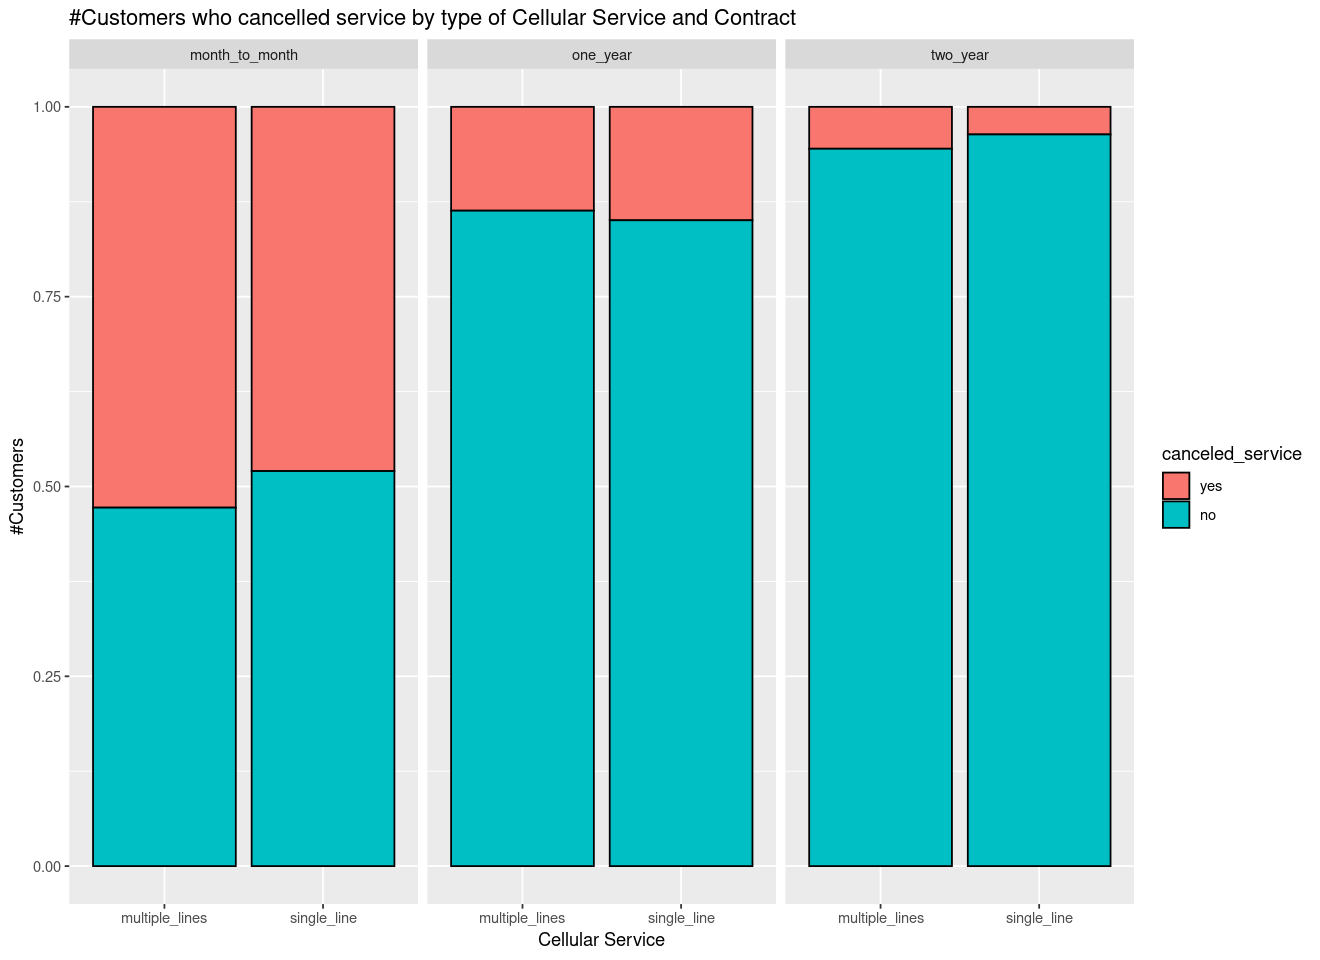

In [213]:
library(dplyr)
library(ggplot2)
telecom_df %>% 
  group_by(canceled_service,cellular_service,contract) %>% 
  summarise(total_customers=n()) %>% 
  arrange(canceled_service)

ggplot(telecom_df,aes(x=cellular_service,fill=canceled_service))+
  geom_bar(stat='count',color='black',position='fill')+
  facet_wrap(~contract)+
  labs(title = '#Customers who cancelled service by type of Cellular Service and Contract',
       x = 'Cellular Service', 
       y = '#Customers')


## Question 2


**Question**:Do device support and tech support plans play a role in why consumers leave?




**Answer**:According to the statistics, clients who do not have tech support are canceling their services the most, notably users who do not have both device and tech support plans.


## Supporting Analysis


`summarise()` has grouped output by 'canceled_service', 'device_protection'.
You can override using the `.groups` argument.
New names:
• `` -> `...1`


canceled_service,device_protection,tech_support,total_customers
<fct>,<fct>,<fct>,<int>
yes,yes,yes,27
yes,yes,no,116
yes,no,yes,32
yes,no,no,252
no,yes,yes,180
no,yes,no,200
no,no,yes,131
no,no,no,237


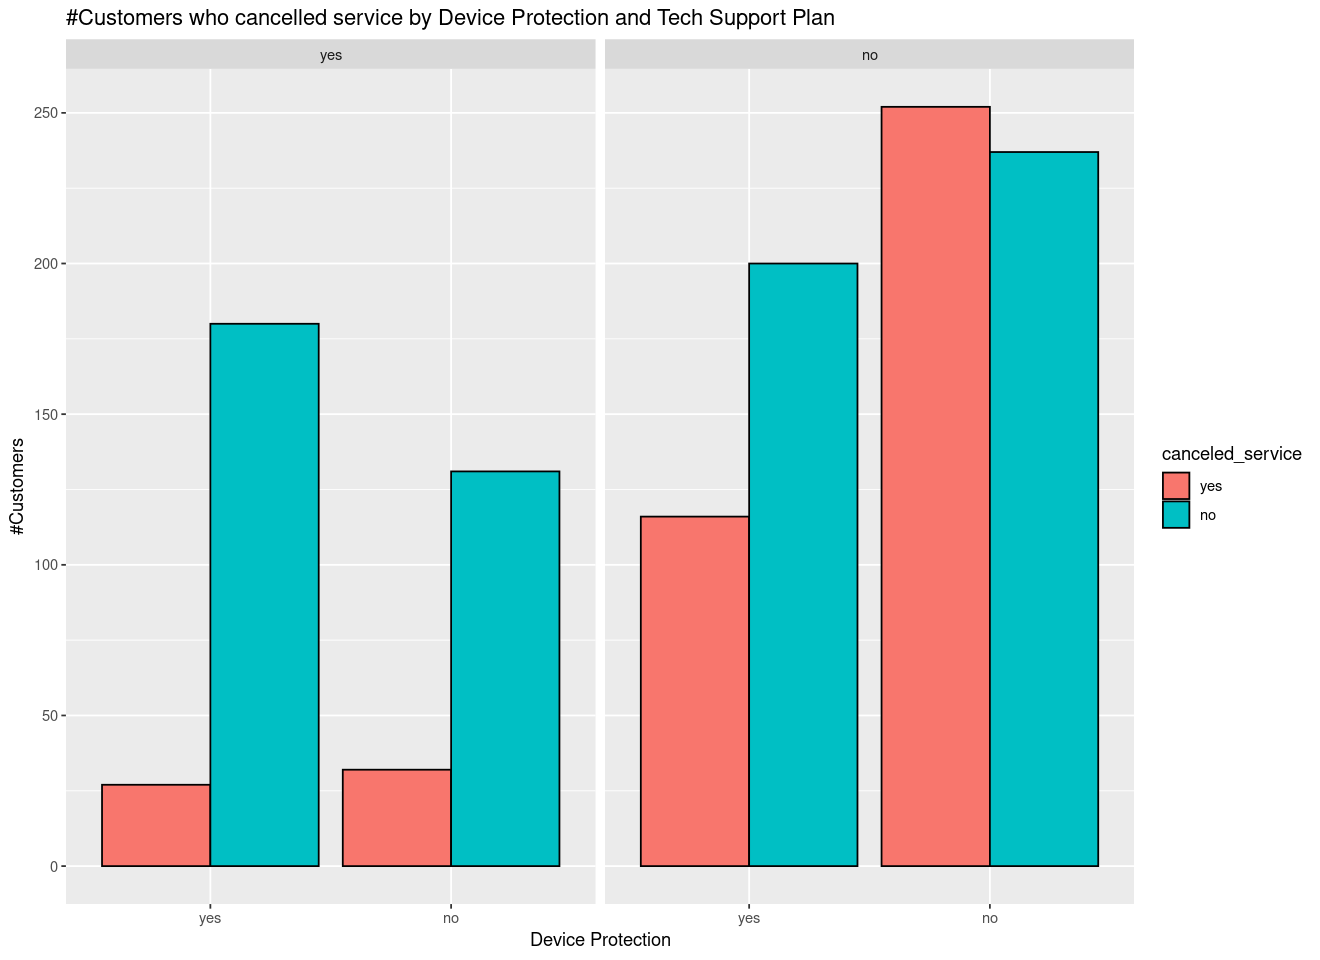

In [214]:
telecom_df %>% 
  group_by(canceled_service,device_protection,tech_support) %>% 
  summarise(total_customers=n()) %>% 
  arrange(canceled_service)

ggplot(telecom_df,aes(x=device_protection,fill=canceled_service))+
  geom_bar(stat='count',color='black',position='dodge')+
  facet_wrap(~tech_support)+
  labs(title = '#Customers who cancelled service by Device Protection and Tech Support Plan',
       x = 'Device Protection', 
       y = '#Customers')


## Question 3


**Question**:how many Customers are canceling their service because of their cellphone or internet package?



**Answer**:There were 223 customers who terminated multiple line service and 204 customers who discontinued single line service. When we break these data down by internet service, it appears that a substantial proportion of consumers using fiber optic internet are canceling their account.


## Supporting Analysis


`summarise()` has grouped output by 'canceled_service'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


canceled_service,cellular_service,total_customers
<fct>,<fct>,<int>
yes,multiple_lines,223
yes,single_line,204
no,multiple_lines,416
no,single_line,332


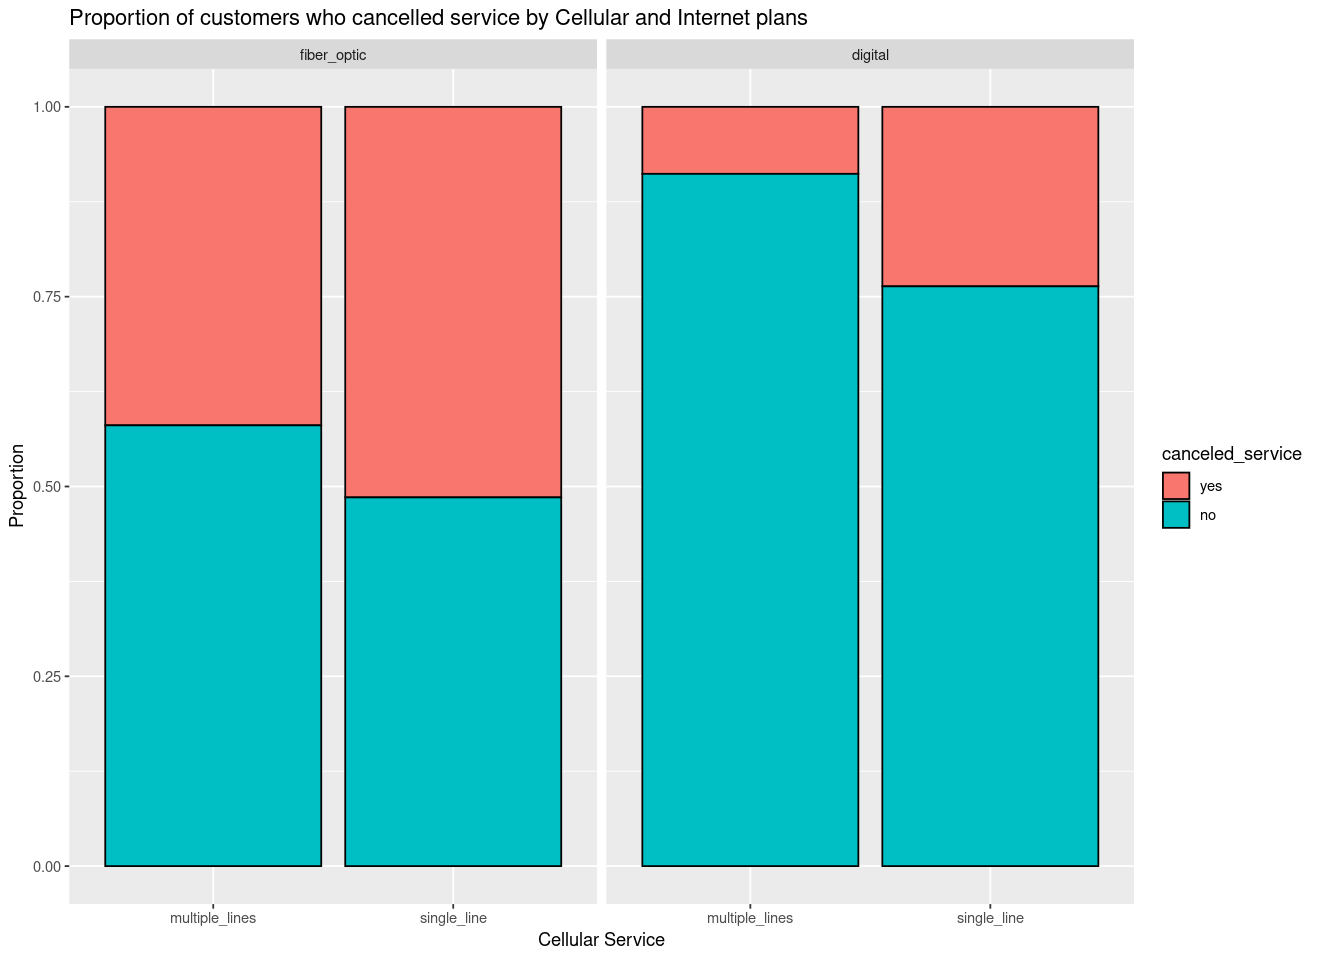

In [215]:
telecom_df %>% 
  group_by(canceled_service,cellular_service) %>% 
  summarise(total_customers=n()) %>% 
  arrange(canceled_service)

ggplot(telecom_df,aes(x=cellular_service,fill=canceled_service))+
  geom_bar(stat='count',color='black',position='fill')+
  facet_wrap(~internet_service)+
  labs(title = 'Proportion of customers who cancelled service by Cellular and Internet plans',
       x = 'Cellular Service', 
       y = 'Proportion')

## Question 4


**Question**:what is the count and average of monthly charges based on the contract?



**Answer**:There is high count of 388 in month_to_month contract to cancel the service with the avearge_monthly_charges of 80.59 and second high count of 383 where customer likley to stay back with the service and the average_monthly_charges is 76.2


In [216]:
## Supporting Analysis


`summarise()` has grouped output by 'canceled_service'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


canceled_service,contract,averagecharges,count
<fct>,<fct>,<dbl>,<int>
yes,month_to_month,80.59227,388
no,month_to_month,76.26828,383
no,two_year,90.33842,190
no,one_year,85.09257,175
yes,one_year,92.06897,29
yes,two_year,102.40500,10


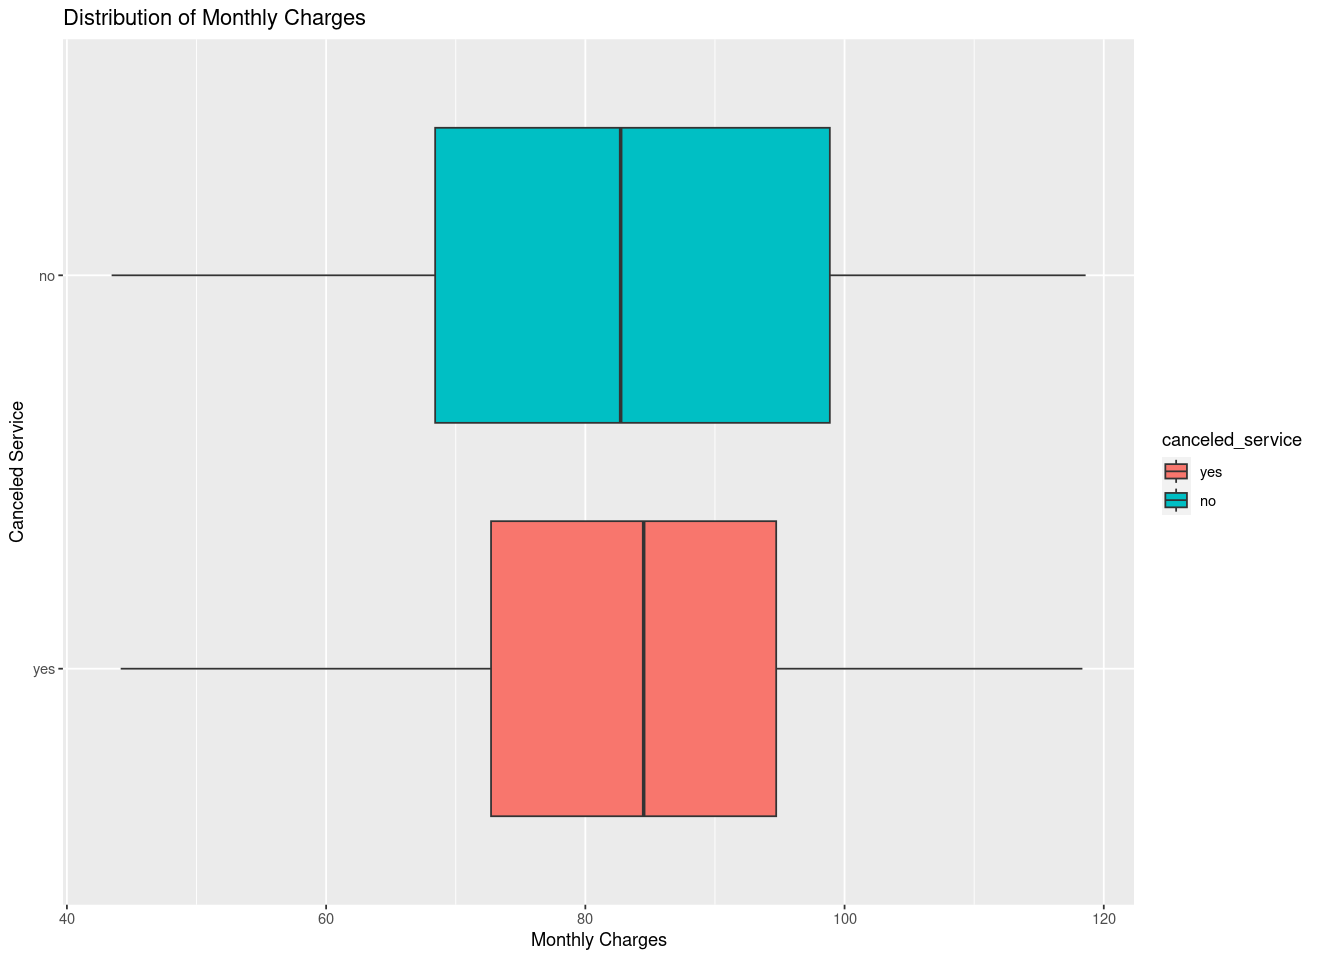

In [217]:
telecom_df %>%
  group_by(canceled_service,contract) %>%
  summarize(averagecharges = mean(monthly_charges),count=n())%>%
  arrange(desc(count))


ggplot(telecom_df,aes(x=reorder(canceled_service,monthly_charges,FUN=max),y=monthly_charges,fill=canceled_service))+
  geom_boxplot()+
  coord_flip()+
  labs(title = 'Distribution of Monthly Charges',
       x = 'Canceled Service', 
       y = 'Monthly Charges')


## Question 5


**Question**:Do customers who have been with the company for more months tend to cancel their subscription?



**Answer**:According to the density graphs, new customers are canceling their account, particularly those who are approximately 10 months old, and a large number of consumers are departing 20 months after they joined the service.



## Supporting Analysis


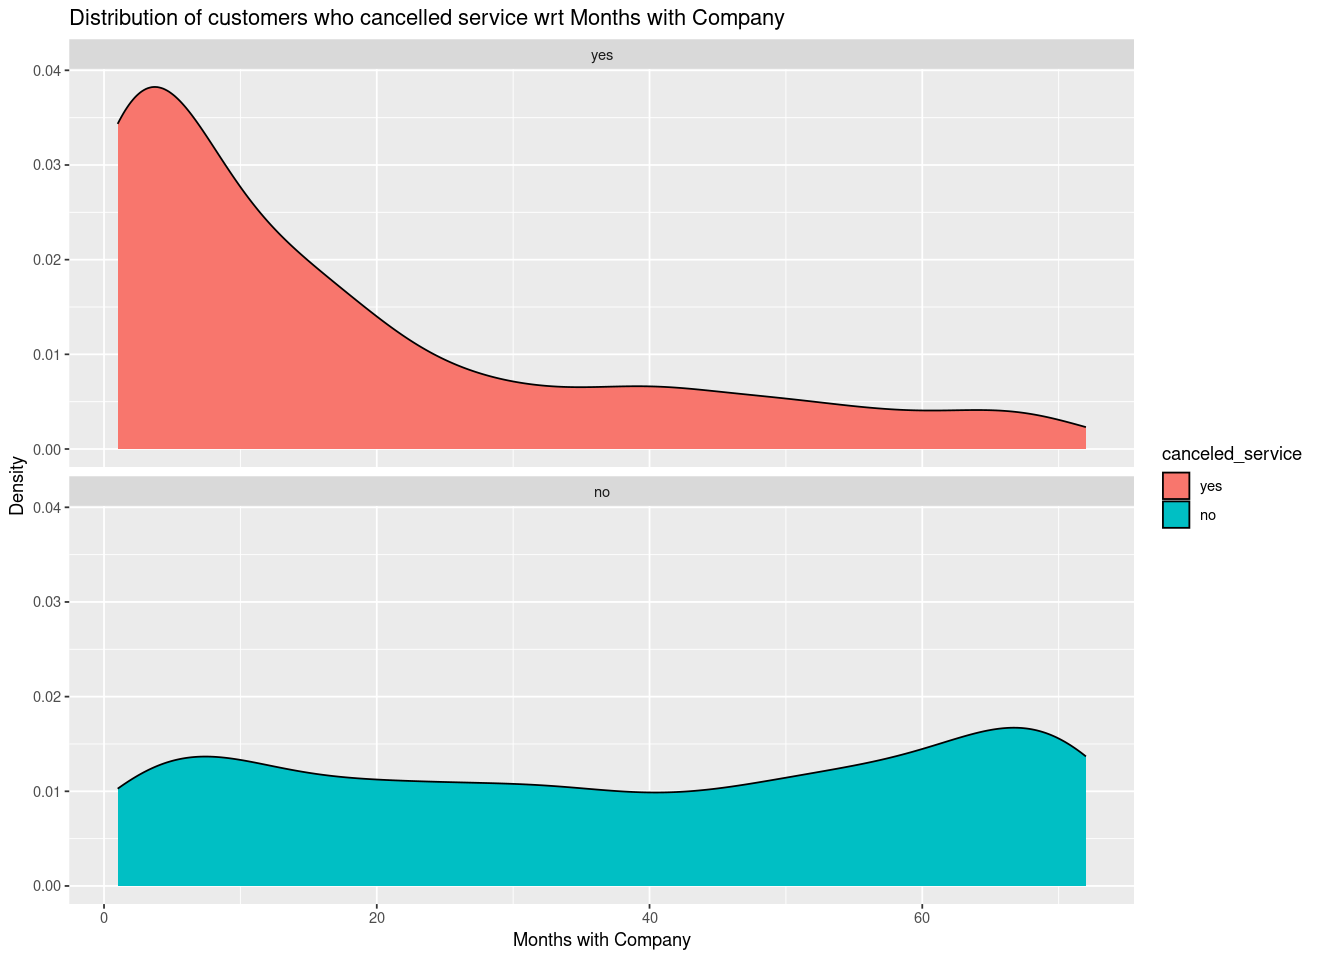

In [218]:
ggplot(telecom_df,aes(x=months_with_company,fill=canceled_service))+
  geom_density()+
  facet_wrap(~canceled_service,nrow=2)+
  labs(title = 'Distribution of customers who cancelled service wrt Months with Company',
       x = 'Months with Company', 
       y = 'Density')

# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the response variable,`canceled_service`. You should use all of the other variables in the `telecom_df` data as predictor variables for each model.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `telecom_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [219]:
# Run this R code to install ML packages that you might need (Will take about 2 minutes)
install.packages(
    c('vip', 'rpart.plot', 'discrim', 'klaR', 'ranger','yardstick'), 
    repos = 'https://mran.microsoft.com/snapshot/2023-01-01/')

Installing packages into ‘/home/repl/renv/library/R-4.2/x86_64-pc-linux-gnu’
(as ‘lib’ is unspecified)



## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [220]:
set.seed(123) 

library(rsample)
library(dplyr)
library(recipes)
library(parsnip)
library(tidymodels)





In [221]:
set.seed(23)

telecom_split <- initial_split(telecom_df, prop = 0.80, strata = canceled_service)

telecom_train <- telecom_split %>% training()

telecom_test <- telecom_split %>% testing()

# Cross validation

tele_folds<-vfold_cv(telecom_train,v=10,strata=canceled_service)


## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [222]:
telecom_rec <- recipe(canceled_service ~ ., data = telecom_train) %>%step_center(all_numeric(), -has_role("id")) %>%
  step_scale(all_numeric(), -all_outcomes()) %>%
  step_dummy(all_nominal(), -all_outcomes())

## Model 1 Training

In [224]:
model_1_training <- logistic_reg() %>% 
           set_engine('glm') %>% 
           set_mode('classification')
workflow_model_1 <- workflow() %>% 
              add_model(model_1_training) %>% 
              add_recipe(telecom_rec)

In [225]:

model_metrics <- metric_set(accuracy, f_meas, roc_auc)

last_fit_model1 <- workflow_model_1 %>% 
                   last_fit(split = telecom_split, metrics = model_metrics)


## Model 1 Performance Evaluation

In [226]:
model1_metrics <- last_fit_model1 %>% 
                  collect_metrics()

model1_pred <- last_fit_model1 %>% 
               collect_predictions()

model1_metrics



.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8093220,Preprocessor1_Model1
f_meas,binary,0.7272727,Preprocessor1_Model1
roc_auc,binary,0.8827132,Preprocessor1_Model1


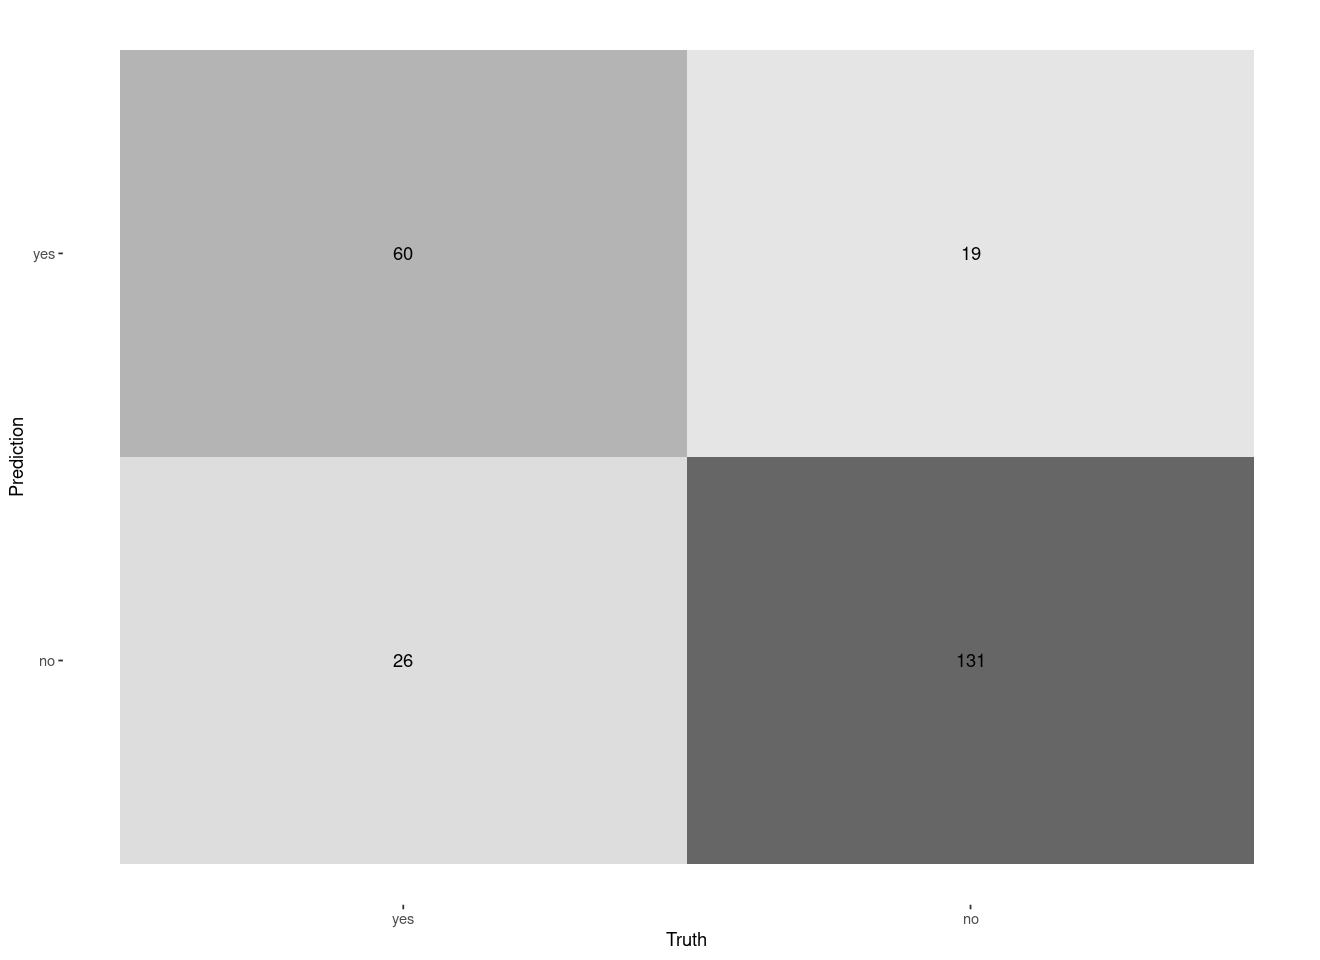

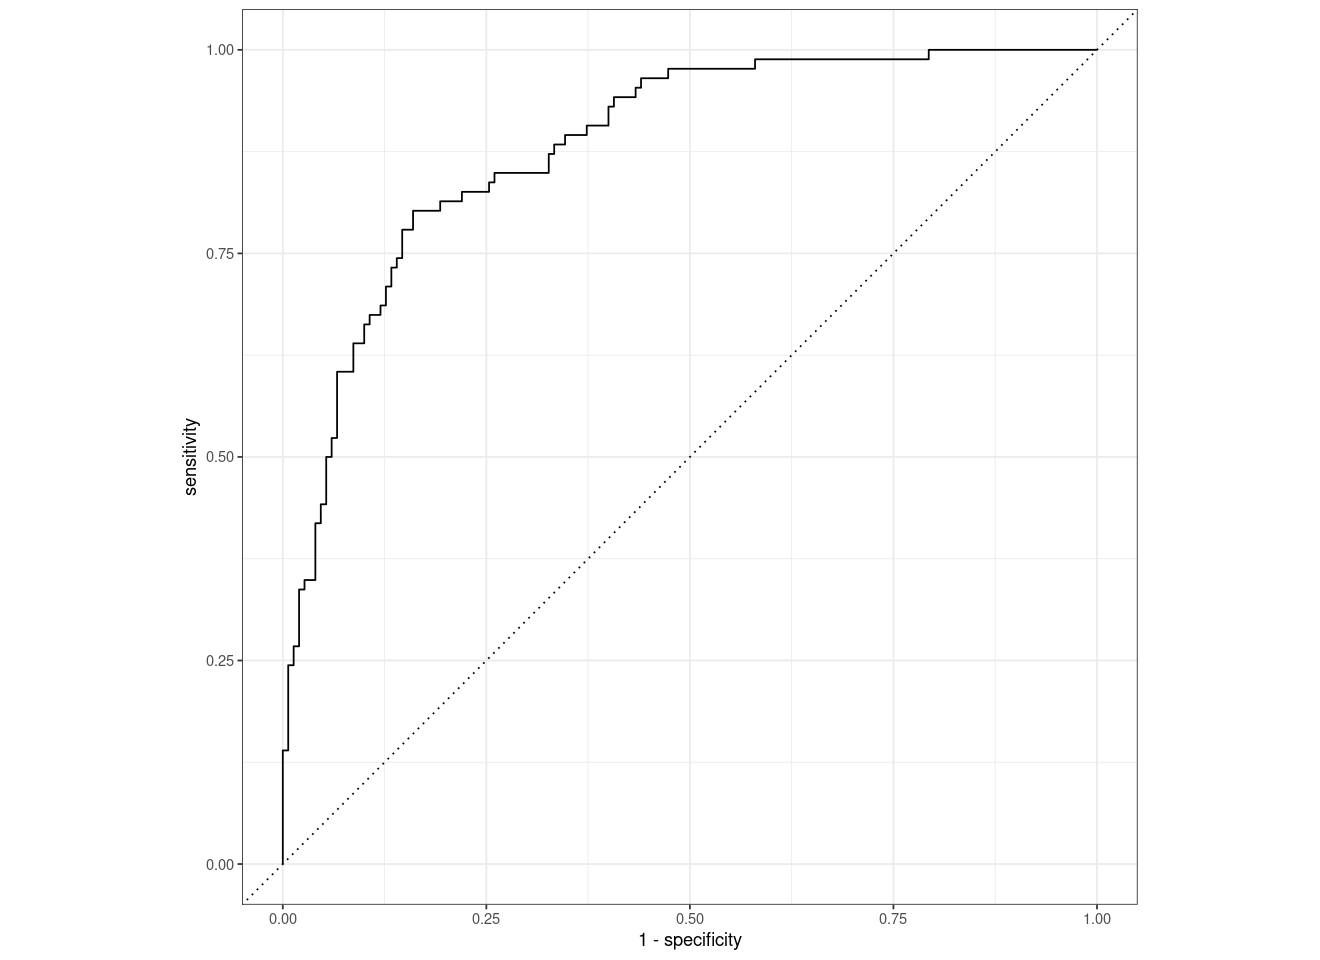

In [227]:
conf_mat(model1_pred, truth = canceled_service, estimate = .pred_class) %>% 
  autoplot(type='heatmap')

model1_pred %>% 
  roc_curve(truth = canceled_service, estimate = .pred_yes) %>% 
  autoplot()

## Model 2 Training

In [228]:
model_2_training <- nearest_neighbor(neighbors=tune()) %>% 
           set_engine('kknn') %>% 
           set_mode('classification')

workflow_model_2 <- workflow() %>% 
              add_model(model_2_training) %>% 
              add_recipe(telecom_rec)


In [229]:
model2_grid <- tibble(neighbors=c(5,15,25,35,45,55)) 

set.seed(300)

model2_tuning <- workflow_model_2 %>% 
                 tune_grid(resamples=tele_folds,grid=model2_grid)

best_model <- model2_tuning %>% 
              select_best(metric='roc_auc')

final_workflow2 <- workflow_model_2 %>% 
                   finalize_workflow(best_model)
last_fit_model2 <- final_workflow2 %>% 
                   last_fit(split = telecom_split, metrics = model_metrics)

## Model 2 Performance Evaluation

In [230]:


model2_metrics <- last_fit_model2 %>% 
                  collect_metrics()

model2_pred <- last_fit_model2 %>% 
               collect_predictions()

model2_metrics

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8050847,Preprocessor1_Model1
f_meas,binary,0.7415730,Preprocessor1_Model1
roc_auc,binary,0.8616279,Preprocessor1_Model1


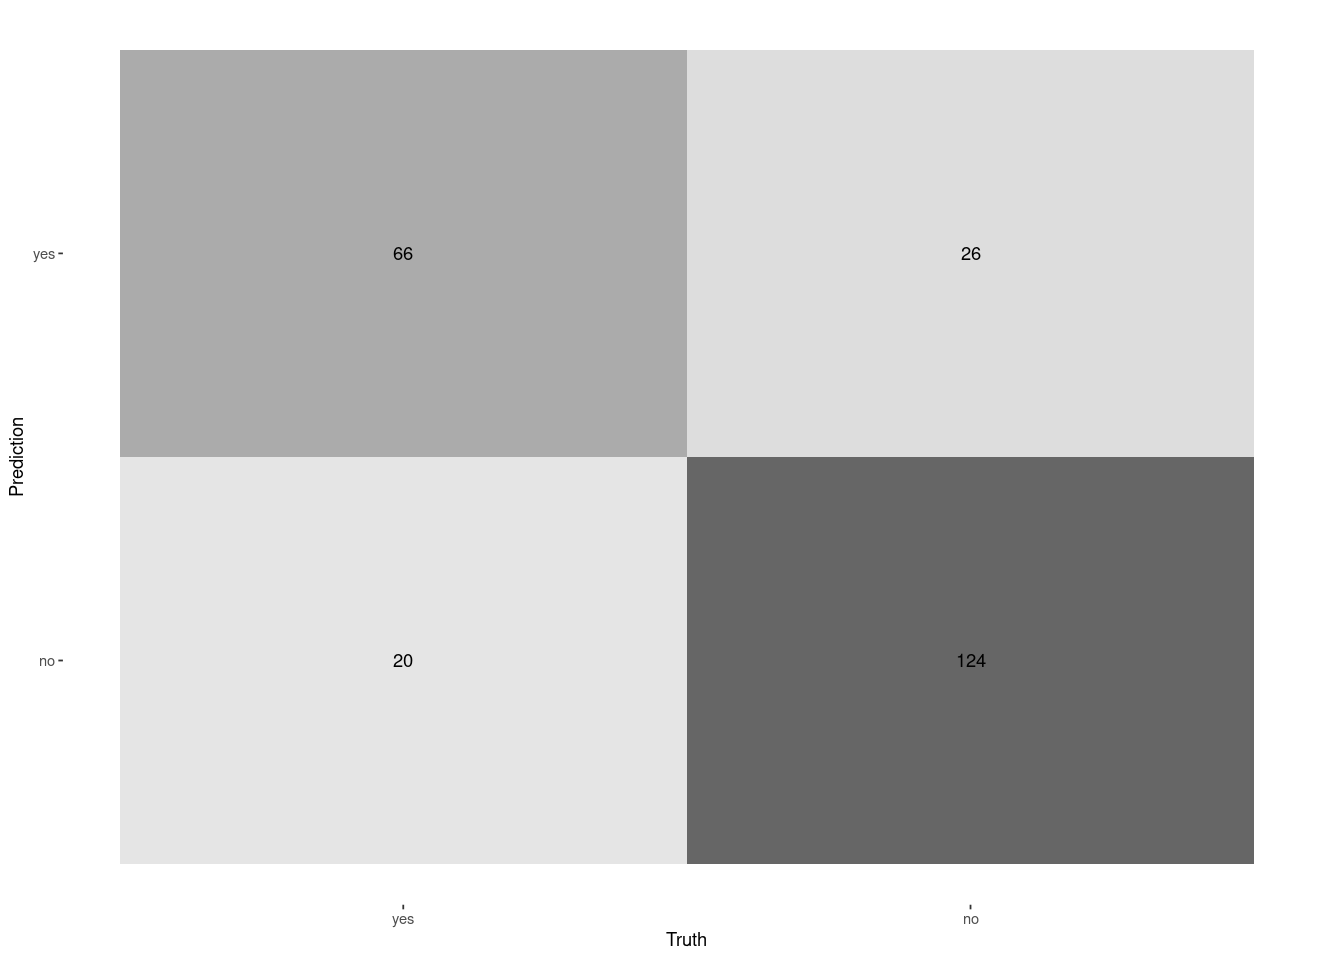

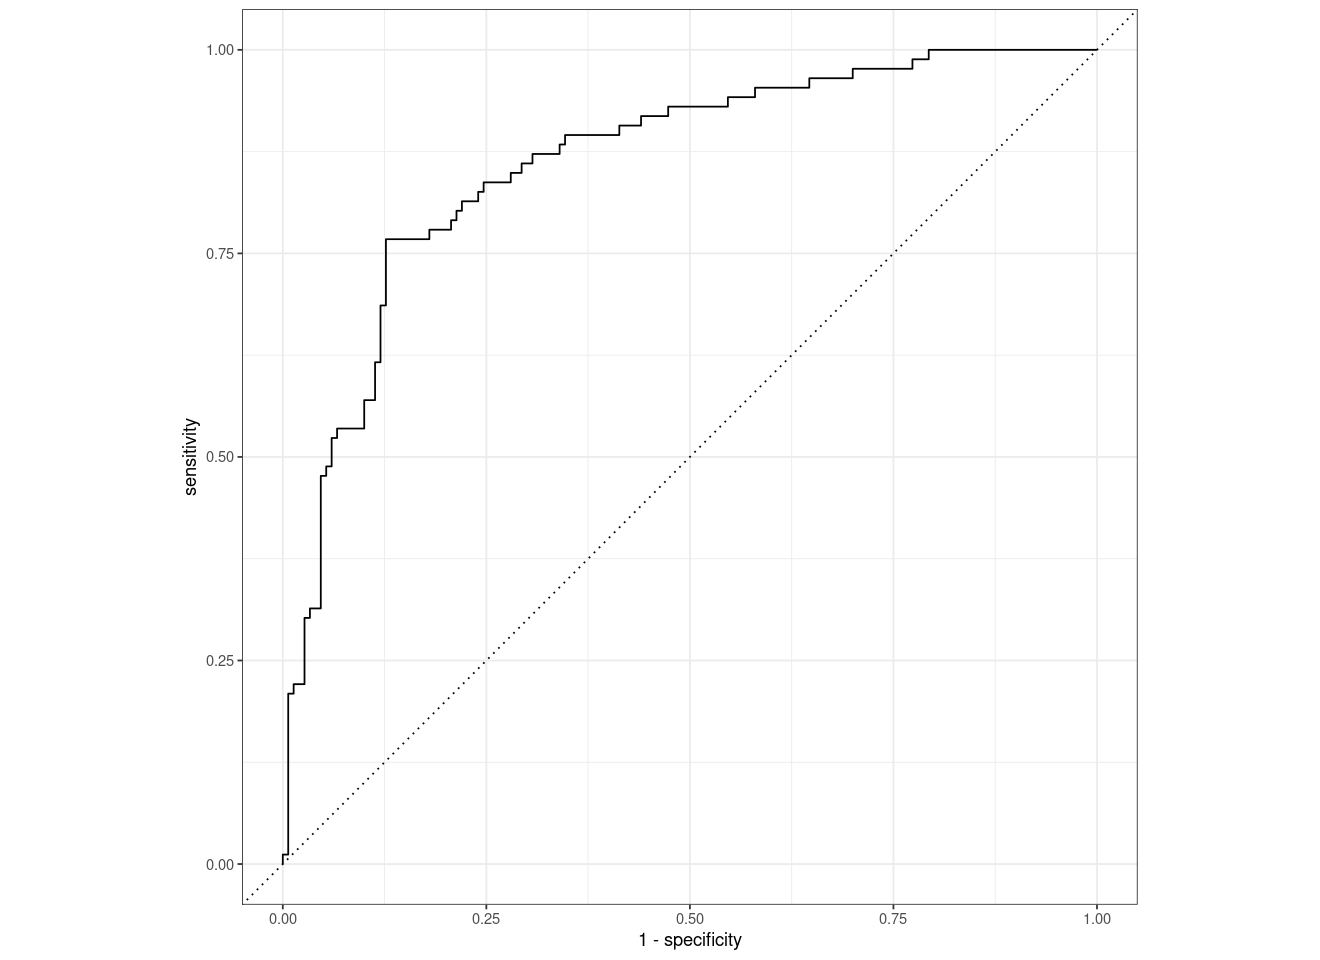

In [231]:
conf_mat(model2_pred, truth = canceled_service, estimate = .pred_class) %>% 
  autoplot(type='heatmap')

model2_pred %>% 
  roc_curve(truth = canceled_service, estimate = .pred_yes) %>% 
  autoplot()



## Model 3 Training

In [232]:
model_3_training <- decision_tree(cost_complexity=tune(),tree_depth=tune(),min_n=tune()) %>% 
           set_engine('rpart') %>% 
           set_mode('classification')

workflow_model_3 <- workflow() %>% 
              add_model(model_3_training) %>% 
              add_recipe(telecom_rec)


In [233]:
model3_grid <- grid_regular(extract_parameter_set_dials(model_3), levels = 2)

set.seed(300)

model3_tuning <- workflow_model_3 %>% 
                 tune_grid(resamples=tele_folds,grid=model3_grid)

best_model <- model3_tuning %>% 
              select_best(metric='roc_auc')

final_workflow3 <- workflow_model_3 %>% 
                   finalize_workflow(best_model)
last_fit_model3 <- final_workflow3 %>% 
                   last_fit(split = telecom_split, metrics = model_metrics)


## Model 3 Performance Evaluation

In [234]:
model3_metrics <- last_fit_model3 %>% 
                  collect_metrics()

model3_pred <- last_fit_model3 %>% 
               collect_predictions()

model3_metrics

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.7838983,Preprocessor1_Model1
f_meas,binary,0.7118644,Preprocessor1_Model1
roc_auc,binary,0.8223256,Preprocessor1_Model1


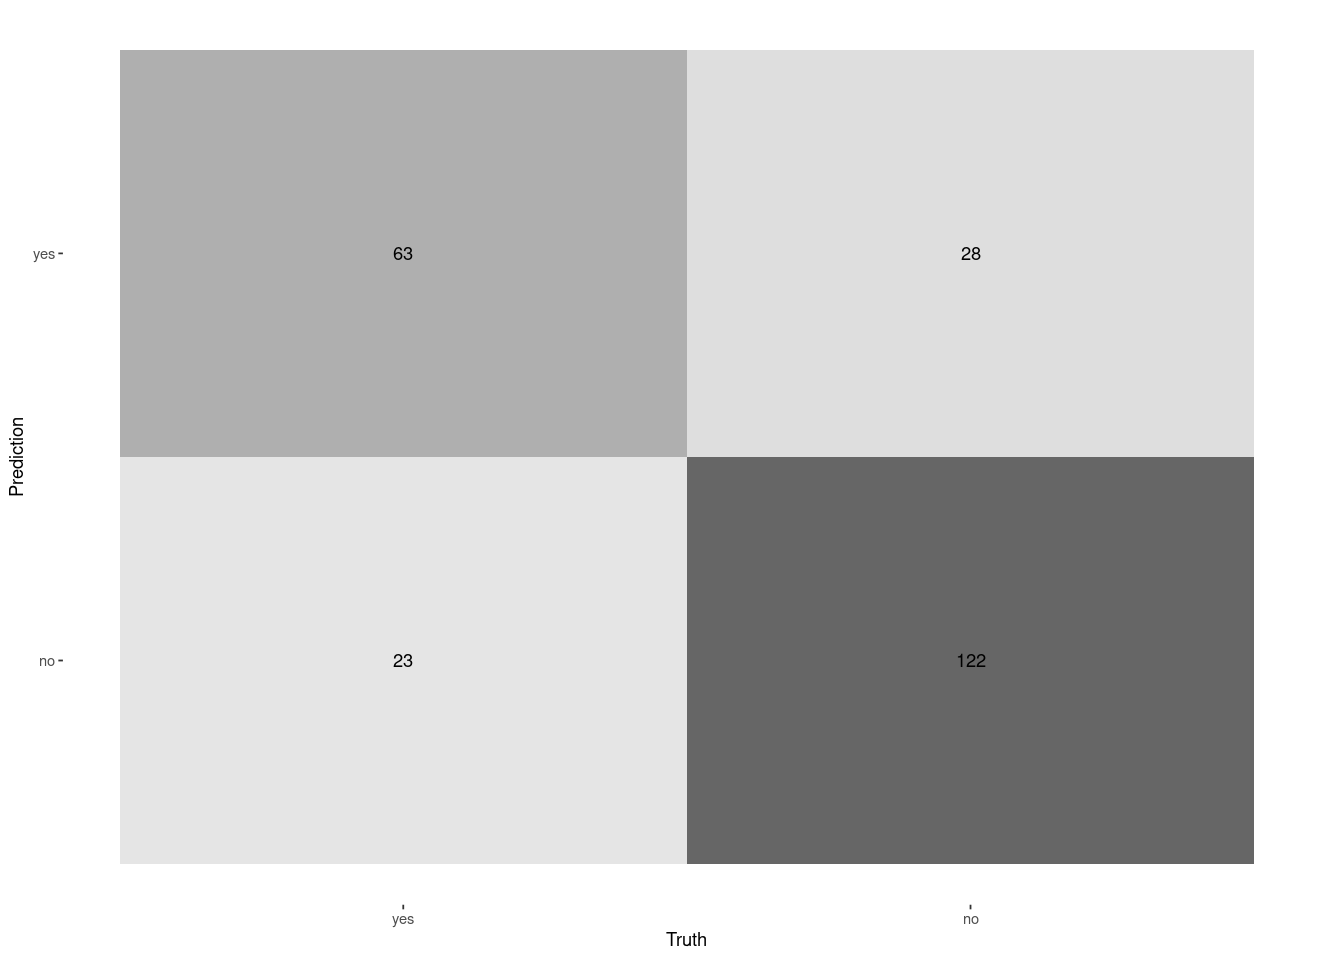

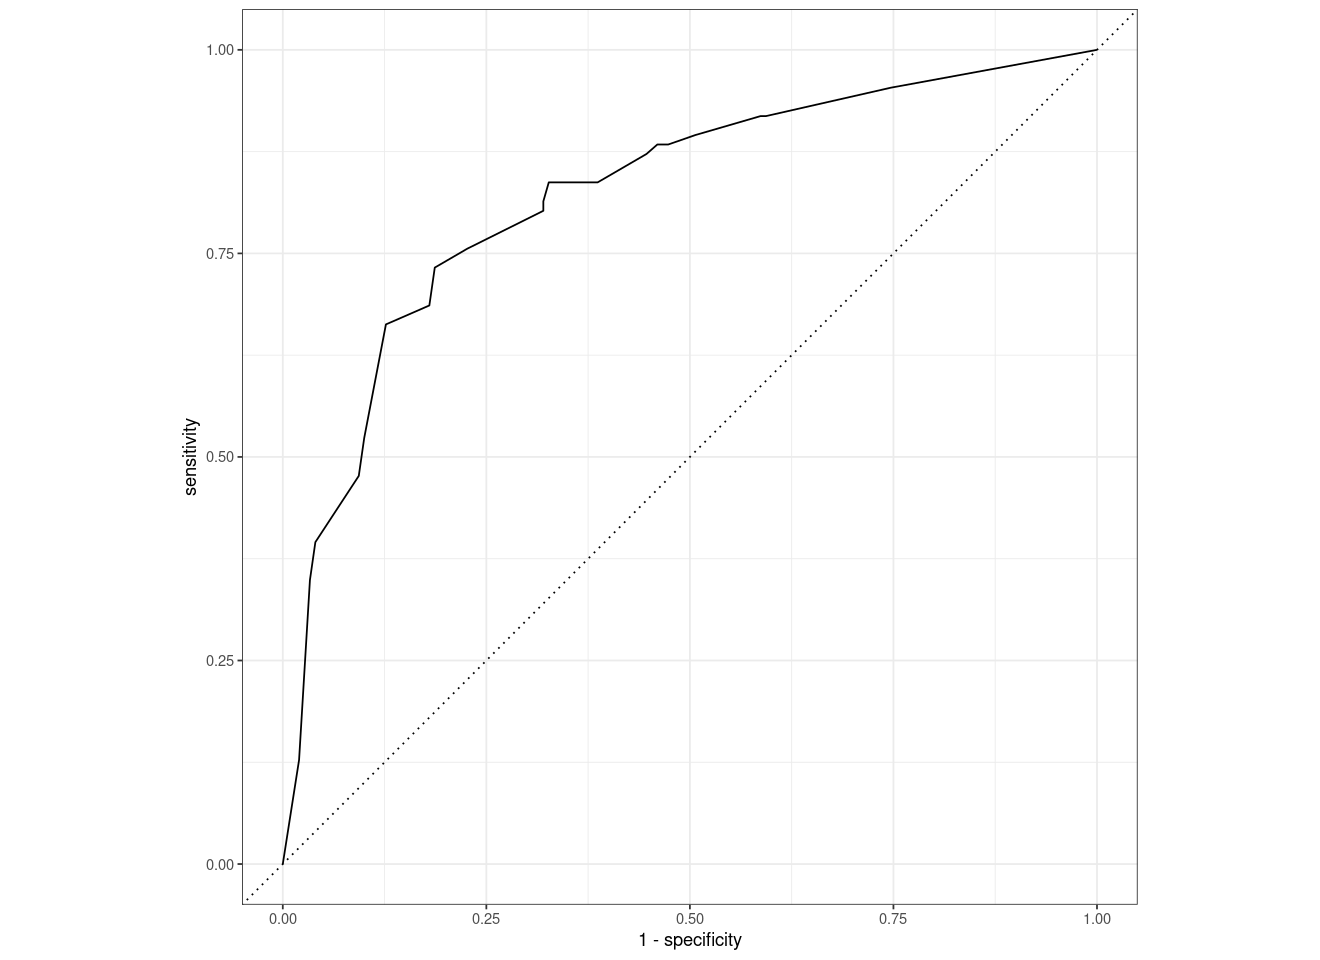

In [235]:
conf_mat(model3_pred, truth = canceled_service, estimate = .pred_class) %>% 
  autoplot(type='heatmap')

model3_pred %>% 
  roc_curve(truth = canceled_service, estimate = .pred_yes) %>% 
  autoplot()

# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction
The company is trying to solve the problem of losing customers at a record level, which is leading to large financial losses. The company aims to identify the factors that lead to customer cancellations, predict which customers are at risk of canceling, and implement policies to reduce the risk of service cancellation.

The goal of the analysis was to explore the relationship between canceled_service and other variables in the telecom_df data set to identify the factors that drive the differences between customers who do and do not cancel their service. The specific questions addressed in the analysis included whether the length of the contract or the method of payment has an impact on the likelihood of canceled_service, and whether there is a correlation between canceled_service and the monthly charges of customers.

The analysis is essential as it can help the company understand the factors that lead to customer cancellations, which can enable the company to take proactive steps to reduce the risk of service cancellation. In addition, the analysis can help the company develop machine learning algorithms that predict the likelihood of a customer canceling their service in the future, reducing financial losses due to customer cancellations. The insights gained from the analysis can help the company remain competitive and maintain its customer base in the long run.

...



## Key Findings

According to the summary table, 199 clients with multiple lines and 189 customers with single lines had their month-to-month subscription discontinued. A substantial proportion of customers who dropped their service had a month-to-month contract. Clients who do not have tech support are the most likely to abandon their services, particularly those who do not have both device and tech support contracts. There were 223 customers who dropped multiple line service and 204 who dropped single line service. When we split these numbers down by internet service, it appears that a sizable fraction of fiber optic internet users are quitting their service. New customers are canceling their accounts, particularly those that are less than 10 months old, and a considerable percentage of clients are leaving 20 months after joining the service.

...


## Modeling Results

After trying several classification models, we found that the Logistic regression model had the best performance for predicting whether a customer will cancel their service or not. The model achieved an ROC_AUD of 0.88 where as KNN and Decision tree as the little difference of thr ROC_AUC of 0.86 and 0.82.To put this into more understandable terms, the model correctly predicted 88% of the customers who canceled their service and those who did not. This is a good result for the business, as it means that they can proactively identify customers who are likely to cancel their service and take actions to retain them.Overall, these results show that the Logistic regression model  can be a useful tool for the company to predict customer churn and take proactive actions to retain customers. However, it is important to keep in mind that there is always some degree of uncertainty in predicting future behavior, and the model's performance on new, unseen data may differ from what we observed in the test data.
...


## Recommendations

Introduce more bundled services: The customers who subscribed to bundled services were less likely to cancel the service. By introducing more bundled services, the company can increase customer retention.

Encourage longer contracts: The customers who had a longer tenure with the company were less likely to cancel the service. Encouraging customers to sign longer contracts can increase customer retention.

Offer incentives for using automatic payment methods: The customers who used electronic check as their payment method were more likely to cancel the service. Offering incentives for using automatic payment methods can increase customer retention.

Monitor and reduce monthly charges: The customers who had high monthly charges were more likely to cancel the service. The company can monitor and reduce monthly charges by offering more affordable plans or negotiating better deals with vendors.


...